# "Restaurant Food: Customer Preferences and Rating Analysis Across Cuisines and Cities"

In [106]:
import numpy as np 
import pandas as pd

In [107]:
import warnings 
warnings.filterwarnings('ignore')

# Level -1 : 
Task 1. Data exploration and preprocessing

Task 2. Descriptive Analysis

Task 3. Geospatial Analysis

In [108]:
#reading the dataset 
df = pd.read_csv('Dataset .csv')

In [109]:
# let's take a look at the first few rows 
df.head(500)

Restaurant ID                 Restaurant Name  Country Code  \
0          6317637                Le Petit Souffle           162   
1          6304287                Izakaya Kikufuji           162   
2          6300002          Heat - Edsa Shangri-La           162   
3          6318506                            Ooma           162   
4          6314302                     Sambo Kojin           162   
..             ...                             ...           ...   
495       17621552   Kahill's Steak-Fish Chophouse           216   
496       17096140        Rumba Island Bar & Grill           216   
497       17099925                Red Mesa Cantina           216   
498       17092257                      BellaBrava           216   
499       17092799  Ceviche Tapas Bar & Restaurant           216   

                 City                                            Address  \
0         Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1         Makati City  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2    Mandaluyong City  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3    Mandaluyong City  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4    Mandaluyong City  Third Floor, Mega Atrium, SM Megamall, Ortigas...   
..                ...                                                ...   
495        Sioux City           385 E 4th St, South Sioux City, IA 68776   
496         Tampa Bay        1800 Gulf To Bay Blvd, Clearwater, FL 33765   
497         Tampa Bay              128 3rd St S, St Petersburg, FL 33701   
498         Tampa Bay  204 Beach Drive Northeast, St Petersburg, FL 3...   
499         Tampa Bay               10 Beach Dr, St Petersburg, FL 33701   

                                       Locality  \
0     Century City Mall, Poblacion, Makati City   
1    Little Tokyo, Legaspi Village, Makati City   
2    Edsa Shangri-La, Ortigas, Mandaluyong City   
3        SM Megamall, Ortigas, Mandaluyong City   
4        SM Megamall, Ortigas, Mandaluyong City   
..                                          ...   
495                            South Sioux City   
496                                  Clearwater   
497                      Downtown St Petersburg   
498                      Downtown St Petersburg   
499                      Downtown St Petersburg   

                                      Locality Verbose   Longitude   Latitude  \
0    Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1    Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2    Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3    SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4    SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   
..                                                 ...         ...        ...   
495                       South Sioux City, Sioux City  -96.409203  42.485608   
496                              Clearwater, Tampa Bay  -82.762624  27.960760   
497                  Downtown St Petersburg, Tampa Bay  -82.636924  27.770026   
498                  Downtown St Petersburg, Tampa Bay  -82.632966  27.773743   
499                  Downtown St Petersburg, Tampa Bay  -82.633329  27.771146   

                                  Cuisines  ...          Currency  \
0               French, Japanese, Desserts  ...  Botswana Pula(P)   
1                                 Japanese  ...  Botswana Pula(P)   
2         Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3                          Japanese, Sushi  ...  Botswana Pula(P)   
4                         Japanese, Korean  ...  Botswana Pula(P)   
..                                     ...  ...               ...   
495               American, Seafood, Steak  ...         Dollar($)   
496                BBQ, Caribbean, Seafood  ...         Dollar($)   
497  Latin American, Mexican, Southwestern  ...         Dollar($)   

In [110]:
# let's look at the number of rows and columns in the datasets  
df.shape

(9551, 21)

In [111]:
#undersatnding the feature nammes in the dataset
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [113]:
# Let's check the missing values 
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [114]:
df['Cuisines'].isnull().sum()

9

In [115]:
# As missing values are very small so we can drop it.
df.dropna(subset=['Cuisines'], inplace=True)


In [116]:
# Here we can see that all missing values are dropped. 
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [117]:
df['Cuisines'].isnull().sum()

0

In [118]:
# summary of the datset: 9542 rows and 21 columns, no null values  
df.shape

(9542, 21)

In [119]:
# Analyzing the distribution of "Aggregate rating"

In [120]:
# let'sfirst check the type of data 
print(df['Aggregate rating'].dtypes)

float64


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

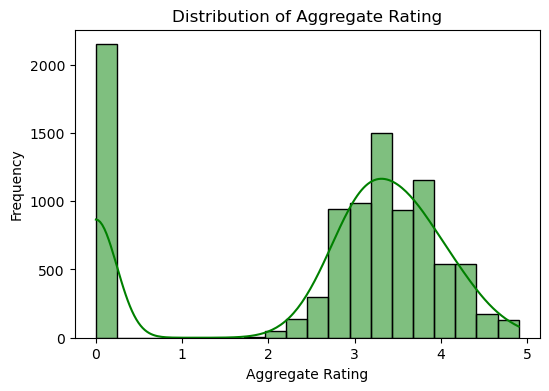

In [122]:
# Plot histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

In [123]:
# Summary statistics
print(df['Aggregate rating'].describe())

count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


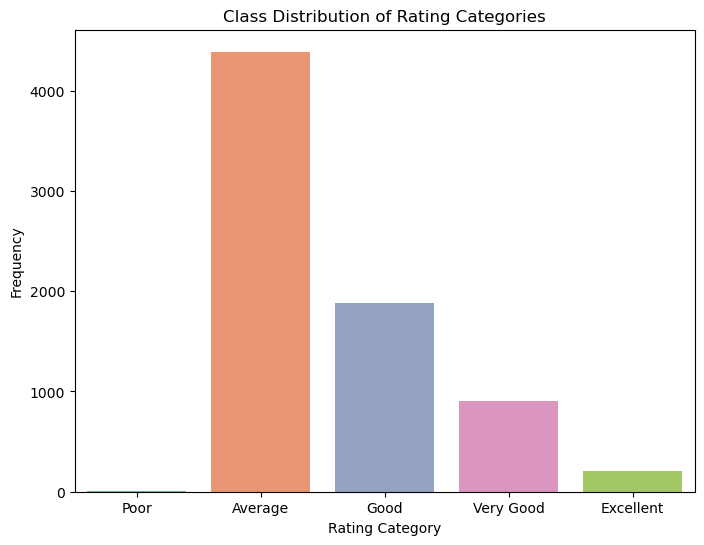

Average      0.593725
Good         0.254531
Very Good    0.122667
Excellent    0.027725
Poor         0.001352
Name: rating_category, dtype: float64


In [124]:
# Bining the ratings into categories
bins = [0, 2, 3.5, 4, 4.5,5]
labels = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent']
df['rating_category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='rating_category', data=df, palette='Set2', order=labels)
plt.title('Class Distribution of Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Frequency')
plt.show()

# Print category counts
print(df['rating_category'].value_counts(normalize=True))


In [125]:
# Task -2 : Descriptive Analysis
# For Numerical Columns

In [126]:
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    64.274997    25.848532   
std     8.791967e+06     56.451600    41.197602    11.010094   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019312e+05      1.000000    77.081565    28.478658   
50%     6.002726e+06      1.000000    77.192031    28.570444   
75%     1.835260e+07      1.000000    77.282043    28.642711   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    130.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [127]:
# Additional specific measures
mean_rating = df['Aggregate rating'].mean()
median_rating = df['Aggregate rating'].median()
std_rating = df['Aggregate rating'].std()


print(f"Mean: {mean_rating}, Median: {median_rating}, Std Dev: {std_rating}")

Mean: 2.665237895619367, Median: 3.2, Std Dev: 1.516587508208202


array([[<Axes: title={'center': 'Restaurant ID'}>,
        <Axes: title={'center': 'Country Code'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Average Cost for two'}>,
        <Axes: title={'center': 'Price range'}>],
       [<Axes: title={'center': 'Aggregate rating'}>,
        <Axes: title={'center': 'Votes'}>, <Axes: >]], dtype=object)

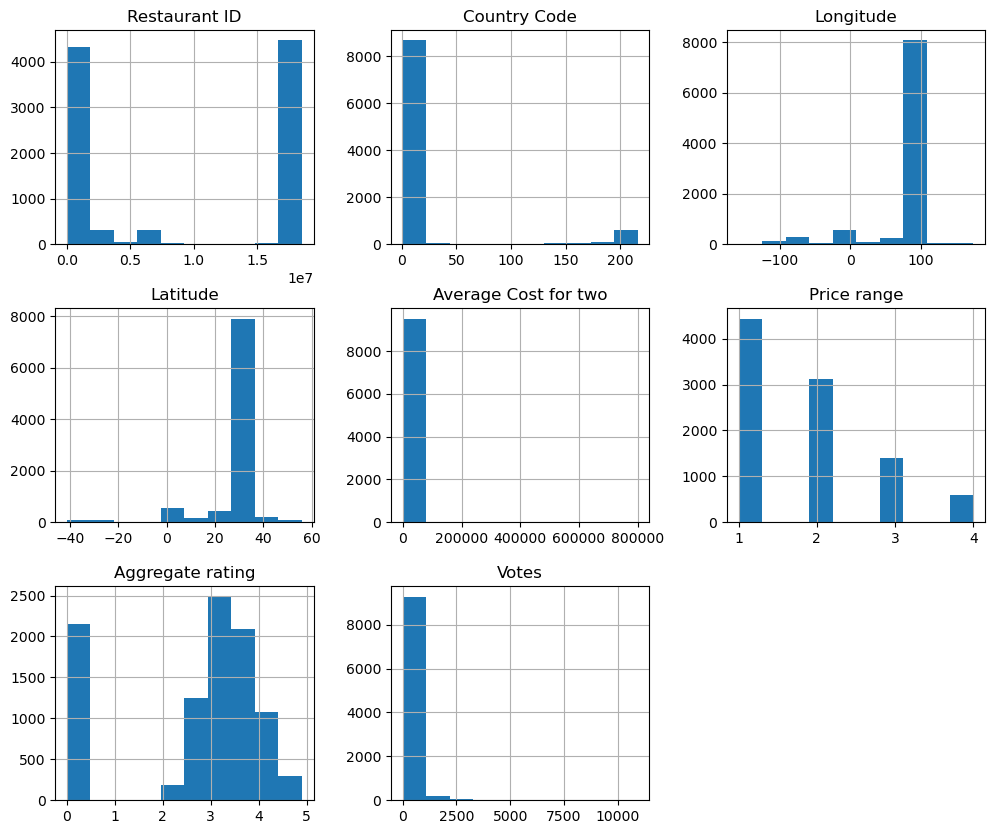

In [128]:
import matplotlib.pyplot as plt 
df.hist(figsize = (12, 10))

In [129]:
# Distribution of Categorical Columns

1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


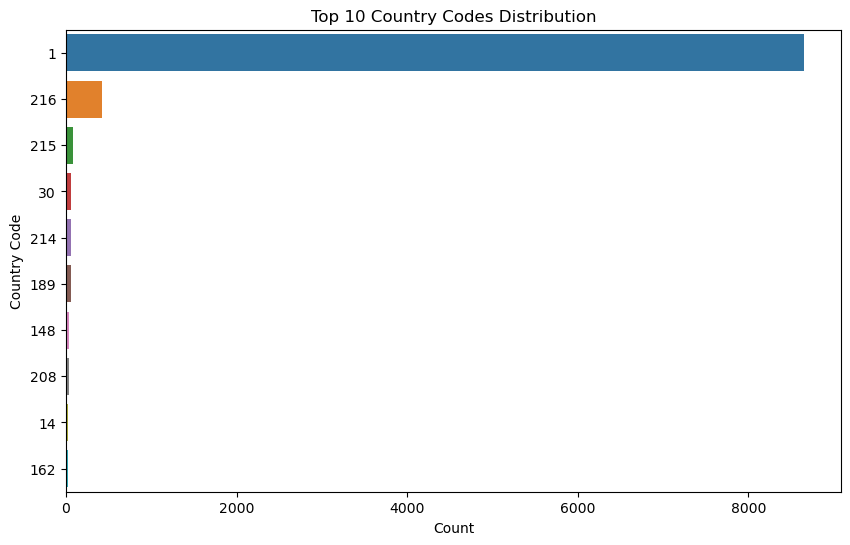

In [130]:
# Distribution of Country Code
country_dist = df['Country Code'].value_counts()
print(country_dist)

# Plot Country Code Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Country Code', data=df, order=country_dist.index[:10])
plt.title('Top 10 Country Codes Distribution')
plt.xlabel('Count')
plt.ylabel('Country Code')
plt.show()

New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: City, Length: 140, dtype: int64


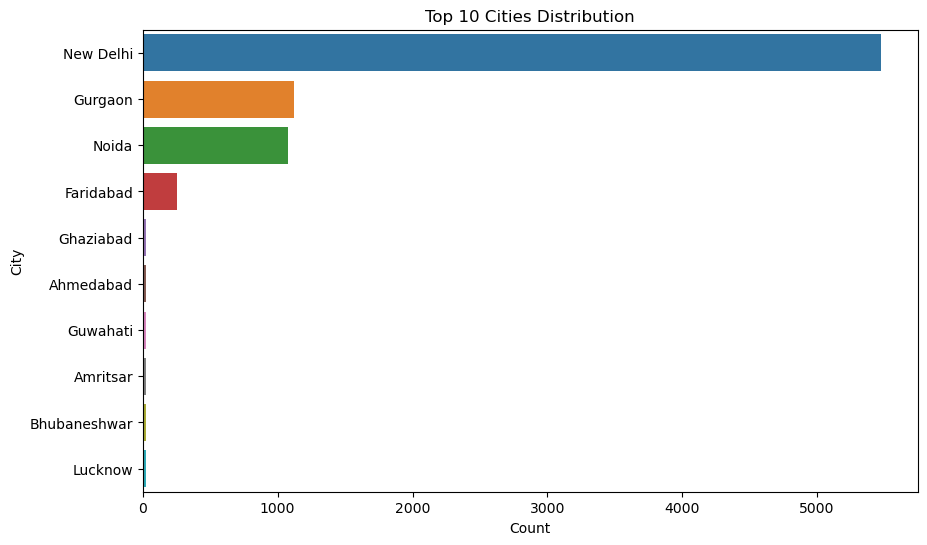

In [131]:
# Distribution of City
city_dist = df['City'].value_counts()
print(city_dist)

# Plot City Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='City', data=df, order=city_dist.index[:10])
plt.title('Top 10 Cities Distribution')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64


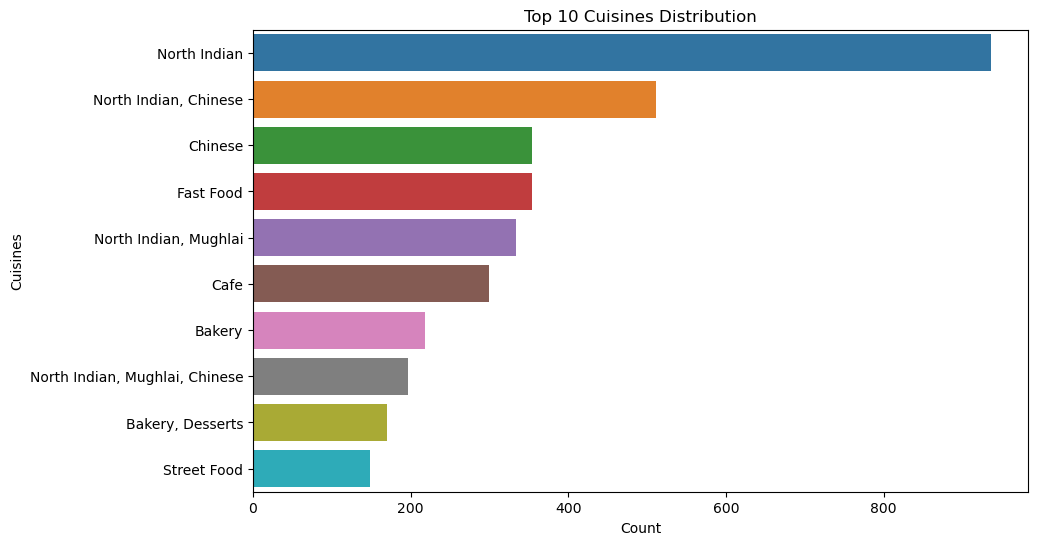

In [132]:
# Distribution of Cuisines
cuisine_dist = df['Cuisines'].value_counts()
print(cuisine_dist)

# Plot Top 10 Cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_dist.values[:10], y=cuisine_dist.index[:10])
plt.title('Top 10 Cuisines Distribution')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

In [133]:
# Identifying the top Cuisines and cities with the Most Restaurants 

In [134]:
# top 10 Cuisines with the Most Restaurants 
top_cuisines = df['Cuisines'].value_counts().head(10)
print("Top 10 Cuisines with the most Restaurants:")
print(top_cuisines)

Top 10 Cuisines with the most Restaurants:
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


In [135]:
# Top 10 Cities with the Most Restaurants
top_cities = df['City'].value_counts().head(10)
print("Top 10 cities with most restaurants:")
print(top_cities)

Top 10 cities with most restaurants:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: City, dtype: int64


In [136]:
import folium
print(folium.__version__) 

0.19.2


In [137]:
import folium

# Create a map centered around the average latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)
restaurant_map.save("map.html")  # Save the map to an HTML file


In [138]:
# Group by city
city_counts = df.groupby('City').size().reset_index(name='count')

# Group by country (if available)
country_counts = df.groupby('Country Code').size().reset_index(name='count')


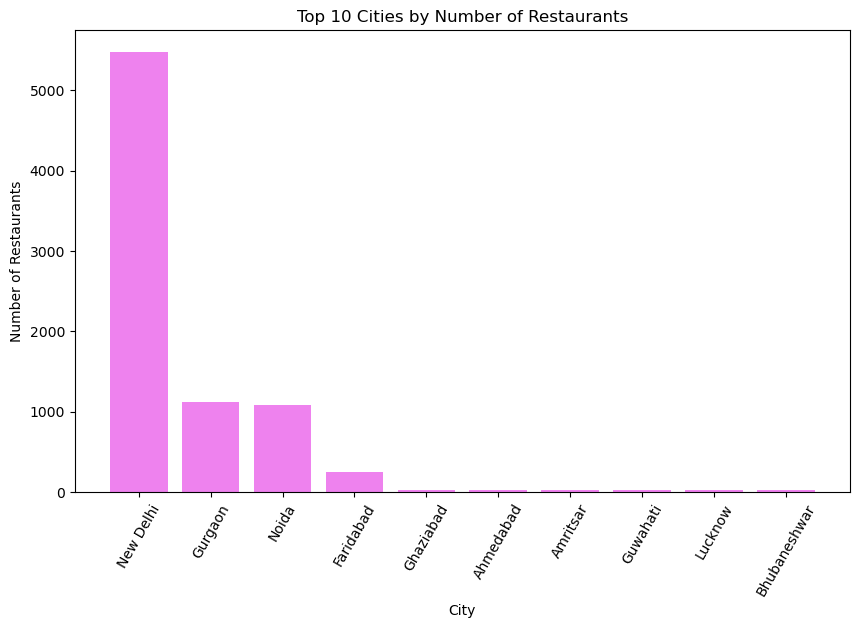

In [139]:
# Bar chart for top cities
city_counts_sorted = city_counts.sort_values(by='count', ascending=False).head(10)  # Top 10 cities
plt.figure(figsize=(10, 6))
plt.bar(city_counts_sorted['City'], city_counts_sorted['count'], color='violet')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xticks(rotation=60)
plt.show()

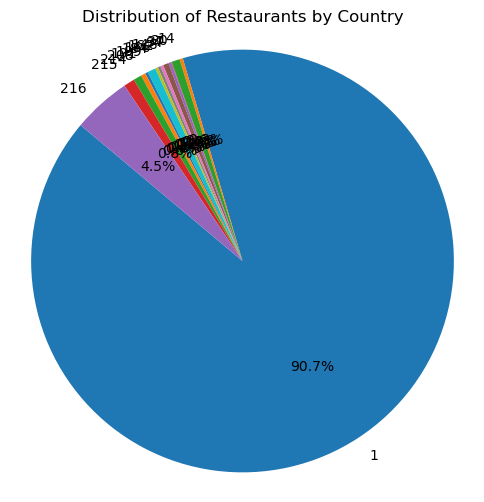

In [140]:
# Pie chart for countries
plt.figure(figsize=(6, 6))
plt.pie(country_counts['count'], labels=country_counts['Country Code'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Restaurants by Country')
plt.axis('equal')
plt.show()

In [141]:
city_group = df.groupby('City').agg(avg_rating=('Aggregate rating', 'mean')).reset_index()


In [142]:

# Add grid identifiers
df['lat_bin'] = np.floor(df['Latitude'] * 10) / 10  # 0.1 degree grid
df['lon_bin'] = np.floor(df['Longitude'] * 10) / 10

# Group by grid
grid_group = df.groupby(['lat_bin', 'lon_bin']).agg(avg_rating=('Aggregate rating', 'mean')).reset_index()


In [143]:
from scipy.stats import spearmanr, pearsonr

# For grid grouping
grid_group['centroid'] = list(zip(grid_group['lat_bin'], grid_group['lon_bin']))
correlation, p_value = spearmanr(grid_group['avg_rating'], grid_group['lat_bin'])

print(f"Spearman Correlation: {correlation}, P-value: {p_value}")


Spearman Correlation: -0.06821286307029861, P-value: 0.20961936409868834


 - A very weak negative monotonic relationship between restaurant location (latitude or longitude bins) and average rating.
 - It means that the location has little to no influence on restaurant ratings.

In [144]:
# Task - 3 : Geospatial Analysis

In [145]:
import plotly.express as px

# Plot the locations of the restaurants on a map
map = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    hover_data=["Cuisines", "Aggregate rating", "City"],
    zoom=1.00,
    height=500,
    title="Restaurant locations"
)
map.update_layout(mapbox_style="carto-positron")
map.show()


In [146]:
location_counts = df.groupby('Locality')['Restaurant Name'].count().reset_index()
print('location_counts')

location_counts


In [147]:

corr_votes = df['Votes'].corr(df["Aggregate rating"])
print("Correlation between number of votes and rating:", corr_votes)

Correlation between number of votes and rating: 0.31347418032500046


In [148]:
corr=px.scatter(df, x="Votes", y="Aggregate rating", hover_name="Restaurant Name")
corr.show()

# Level -2 : 
Task 1. Table Booking and online Delivery

Task 2. Price Range Analysis

Task 3. Feature Engineering

In [149]:
# Task 1. Table Booking and online Delivery

In [150]:
# Calculate the percentage of restaurants with table booking

table_booking_percentage = df['Has Table booking'].value_counts(normalize=True) * 100
print("Table Booking Percentage:")
print(table_booking_percentage)

# Calculate the percentage of restaurants with online delivery
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100
print("Online Delivery Percentage:")
print(online_delivery_percentage)


Table Booking Percentage:
No     87.864179
Yes    12.135821
Name: Has Table booking, dtype: float64
Online Delivery Percentage:
No     74.313561
Yes    25.686439
Name: Has Online delivery, dtype: float64


Average Ratings Based on Table Booking Availability:
Has Table booking
No     2.557956
Yes    3.441969
Name: Aggregate rating, dtype: float64


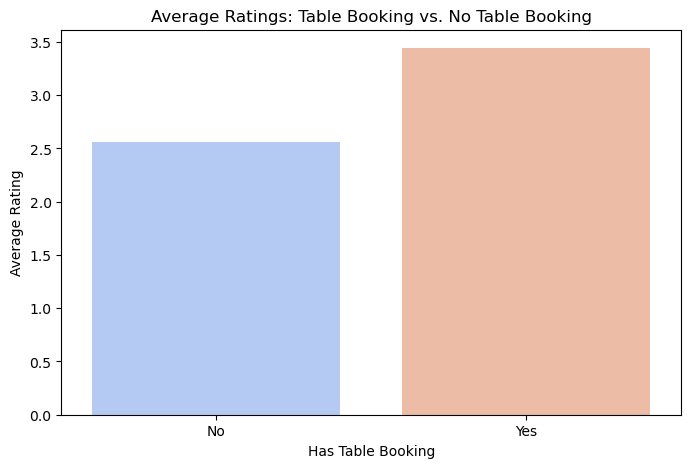

In [151]:
# Group by table booking availability and calculate average rating
table_booking_ratings = df.groupby('Has Table booking')['Aggregate rating'].mean()
print("Average Ratings Based on Table Booking Availability:")
print(table_booking_ratings)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=table_booking_ratings.index, y=table_booking_ratings.values, palette="coolwarm")
plt.title('Average Ratings: Table Booking vs. No Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Rating')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [152]:
print(df.columns)
print(df.dtypes)
print(df.head())



Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'rating_category', 'lat_bin', 'lon_bin'],
      dtype='object')
Restaurant ID              int64
Restaurant Name           object
Country Code               int64
City                      object
Address                   object
Locality                  object
Locality Verbose          object
Longitude                float64
Latitude                 float64
Cuisines                  object
Average Cost for two       int64
Currency                  object
Has Table booking         object
Has Online delivery       object
Is delivering now         object
Switch to order menu      object
Price range               

In [153]:
# Encoding the 'online delivery as binary'
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})


# Encoding the 'table Booking as binary'
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

Online Delivery Percentage by Price Range:
Price range
Low        17.900826
Medium     45.091225
High       34.133043
Premium     7.522124
Name: Has Online delivery, dtype: float64


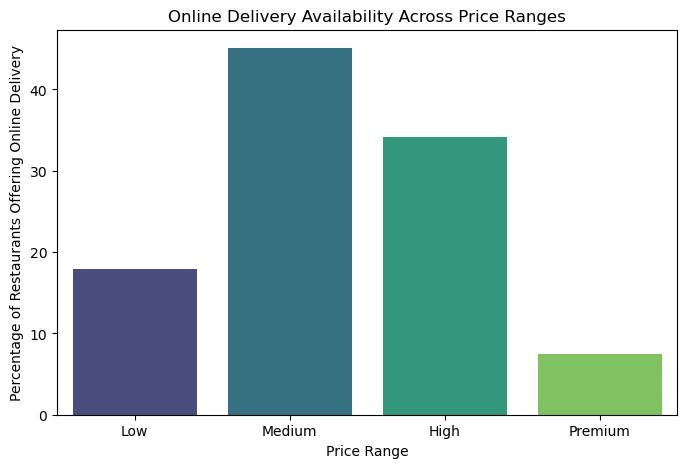

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bin the price range (Cost for Two) into categories
bins = [0, 500, 1000, 2000, 5000]
labels = ['Low', 'Medium', 'High', 'Premium']
df['Price range'] = pd.cut(df['Average Cost for two'], bins=bins, labels=labels)

# Calculate the percentage of online delivery availability in each price range
online_delivery_price_range = df.groupby('Price range')['Has Online delivery'].mean() * 100
print("Online Delivery Percentage by Price Range:")
print(online_delivery_price_range)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=online_delivery_price_range.index, y=online_delivery_price_range.values, palette="viridis")
plt.title('Online Delivery Availability Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants Offering Online Delivery')
plt.show()



In [155]:
df['Price range'].value_counts()

Low        6050
Medium     2302
High        917
Premium     226
Name: Price range, dtype: int64

In [156]:
df['Average Cost for two'].head()

0    1100
1    1200
2    4000
3    1500
4    1500
Name: Average Cost for two, dtype: int64

In [157]:
# Determine the most common price range among all the restaurants 
common_price_range = df.groupby('Price range').size().idxmax()
print(f"Most common price range in the data is {common_price_range}")

Most common price range in the data is Low


In [158]:
# The average range for each price.
df.groupby('Price range')["Aggregate rating"].mean()

Price range
Low        2.316380
Medium     3.061772
High       3.664231
Premium    3.617699
Name: Aggregate rating, dtype: float64

In [159]:
# identifying the colour that represents the highest average rating among the dfferent price ranges 
R_color = df.groupby("Rating color")["Aggregate rating"].mean().idxmax()
print(f"The color that represents the highest average rating among different price ranges is {R_color}")

The color that represents the highest average rating among different price ranges is Dark Green


In [160]:
# Extracting the additional feature from the existing columns, such as the length of resaturent name and address

In [161]:
df['Name_Length'] = df['Restaurant Name'].apply(len)
print(df['Name_Length'])

0       16
1       16
2       22
3        4
4       11
        ..
9546    11
9547    12
9548     5
9549    11
9550    24
Name: Name_Length, Length: 9542, dtype: int64


In [162]:
df['Address_Length'] = df['Address'].apply(len)
print(df['Address_Length'])

0        71
1        67
2        56
3        70
4        64
       ... 
9546    103
9547     77
9548     73
9549     75
9550     65
Name: Address_Length, Length: 9542, dtype: int64


In [163]:
df['Has Table booking'].head()

0    1
1    1
2    1
3    0
4    1
Name: Has Table booking, dtype: int64

In [164]:

df['Has Online delivery'].head()

0    0
1    0
2    0
3    0
4    0
Name: Has Online delivery, dtype: int64

# Level - 3 :
- Task 1. Predictive Modelling

- Task 2. Customer Preference Analysis

- Task 3. Data Visualisation

In [165]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [166]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
Restaurant ID              0
Restaurant Name            0
Country Code               0
City                       0
Address                    0
Locality                   0
Locality Verbose           0
Longitude                  0
Latitude                   0
Cuisines                   0
Average Cost for two       0
Currency                   0
Has Table booking          0
Has Online delivery        0
Is delivering now          0
Switch to order menu       0
Price range               47
Aggregate rating           0
Rating color               0
Rating text                0
Votes                      0
rating_category         2148
lat_bin                    0
lon_bin                    0
Name_Length                0
Address_Length             0
dtype: int64


In [180]:
# Fill missing values for categorical columns with the mode (most frequent value)
df['Price range'].fillna(df['Price range'].mode().iloc[0])

0          High
1          High
2       Premium
3          High
4          High
         ...   
9546        Low
9547        Low
9548        Low
9549        Low
9550        Low
Name: Price range, Length: 9542, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Premium']

In [189]:
# Fill missing values in "Price range" column with the mode (most frequent value)
df['Price range'] = df['Price range'].fillna(df['Price range'].mode().iloc[0])

# Verify that the missing values have been filled
print("\nMissing Values After Filling:")
print(df.isnull().sum())



Missing Values After Filling:
Restaurant ID              0
Restaurant Name            0
Country Code               0
City                       0
Address                    0
Locality                   0
Locality Verbose           0
Longitude                  0
Latitude                   0
Cuisines                   0
Average Cost for two       0
Currency                   0
Has Table booking          0
Has Online delivery        0
Is delivering now          0
Switch to order menu       0
Price range                0
Aggregate rating           0
Rating color               0
Rating text                0
Votes                      0
rating_category         2148
lat_bin                    0
lon_bin                    0
Name_Length                0
Address_Length             0
dtype: int64


In [190]:
print(df['Price range'].isnull().sum())

0


In [198]:
# Define the features and target variable
X = df[["Has Table booking", "Has Online delivery", "Name_Length", "Address_Length"]]
y = df["Aggregate rating"]


In [199]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {X_train.shape[0]}, Testing Set Size: {X_test.shape[0]}")


Training Set Size: 7596, Testing Set Size: 1899


In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {"MSE": mse, "R2": r2}

    # Print the results
    print(f"{model_name} Performance:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R² Score: {r2:.4f}")



Training Linear Regression...
Linear Regression Performance:
  Mean Squared Error (MSE): 2.1588
  R² Score: 0.0687

Training Decision Tree...
Decision Tree Performance:
  Mean Squared Error (MSE): 3.0658
  R² Score: -0.3225

Training Random Forest...
Random Forest Performance:
  Mean Squared Error (MSE): 2.6805
  R² Score: -0.1563


In [201]:
# Print comparison of all models
print("\nModel Performance Comparison:")
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.4f}, R2: {metrics['R2']:.4f}")



Model Performance Comparison:
Linear Regression - MSE: 2.1588, R2: 0.0687
Decision Tree - MSE: 3.0658, R2: -0.3225
Random Forest - MSE: 2.6805, R2: -0.1563


# Interpretation:
- Linear Regression has the best performance with the lowest MSE and the least poor R², but both values suggest that the model is not explaining the data well.
- Decision Tree and Random Forest perform worse in terms of MSE, and the negative R² values suggest that neither model is effectively capturing the underlying data patterns.
- Overall, these results indicate that the models are struggling with this dataset, possibly due to noise, insufficient features, or inappropriate model choices.

In [210]:
df1 = pd.read_csv('Dataset .csv')
df1

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [215]:
# As missing values are very small so we can drop it.
df1.dropna(subset=['Cuisines'], inplace=True)


In [238]:

# Popularity of each cuisine (based on the number of votes)
Top_Cuisines = df1['Cuisines'].value_counts().head()

In [239]:
Top_Cuisines

North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

In [244]:
# Convert 'Cuisines' column to a categorical type if it's not already
df1['Cuisines'] = df1['Cuisines'].astype('category')

# Popularity of each cuisine (based on the number of votes)
cuisine_votes = df1.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Display the results
print("\nPopularity of each cuisine based on the number of votes:")
print(cuisine_votes)



Popularity of each cuisine based on the number of votes:
Cuisines
North Indian, Mughlai                                               53747
North Indian                                                        46241
North Indian, Chinese                                               42012
Cafe                                                                30657
Chinese                                                             21925
                                                                    ...  
Mithai, North Indian, South Indian, Chinese, Street Food, Bakery        0
Cafe, Tibetan                                                           0
Chinese, Fast Food, Pizza                                               0
Chinese, Italian                                                        0
Seafood, Mughlai, North Indian                                          0
Name: Votes, Length: 1825, dtype: int64


In [252]:
#Average rating per cuisine
cuisine_ratings = df1.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print(cuisine_ratings)

Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64


In [254]:
# Combine the two for better analysis
cuisine_analysis = pd.DataFrame({'Total Votes': cuisine_votes,'Average Rating': cuisine_ratings})

# Display the analysis
print(cuisine_analysis)

                                           Total Votes  Average Rating
Cuisines                                                              
Afghani                                             39           0.725
Afghani, Mughlai, Chinese                            2           0.000
Afghani, North Indian                                0           0.000
Afghani, North Indian, Pakistani, Arabian            3           0.000
African                                            373           4.700
...                                                ...             ...
Western, Asian, Cafe                               259           4.200
Western, Fusion, Fast Food                          32           3.200
World Cuisine                                       95           4.900
World Cuisine, Mexican, Italian                    115           4.400
World Cuisine, Patisserie, Cafe                   1034           4.200

[1825 rows x 2 columns]


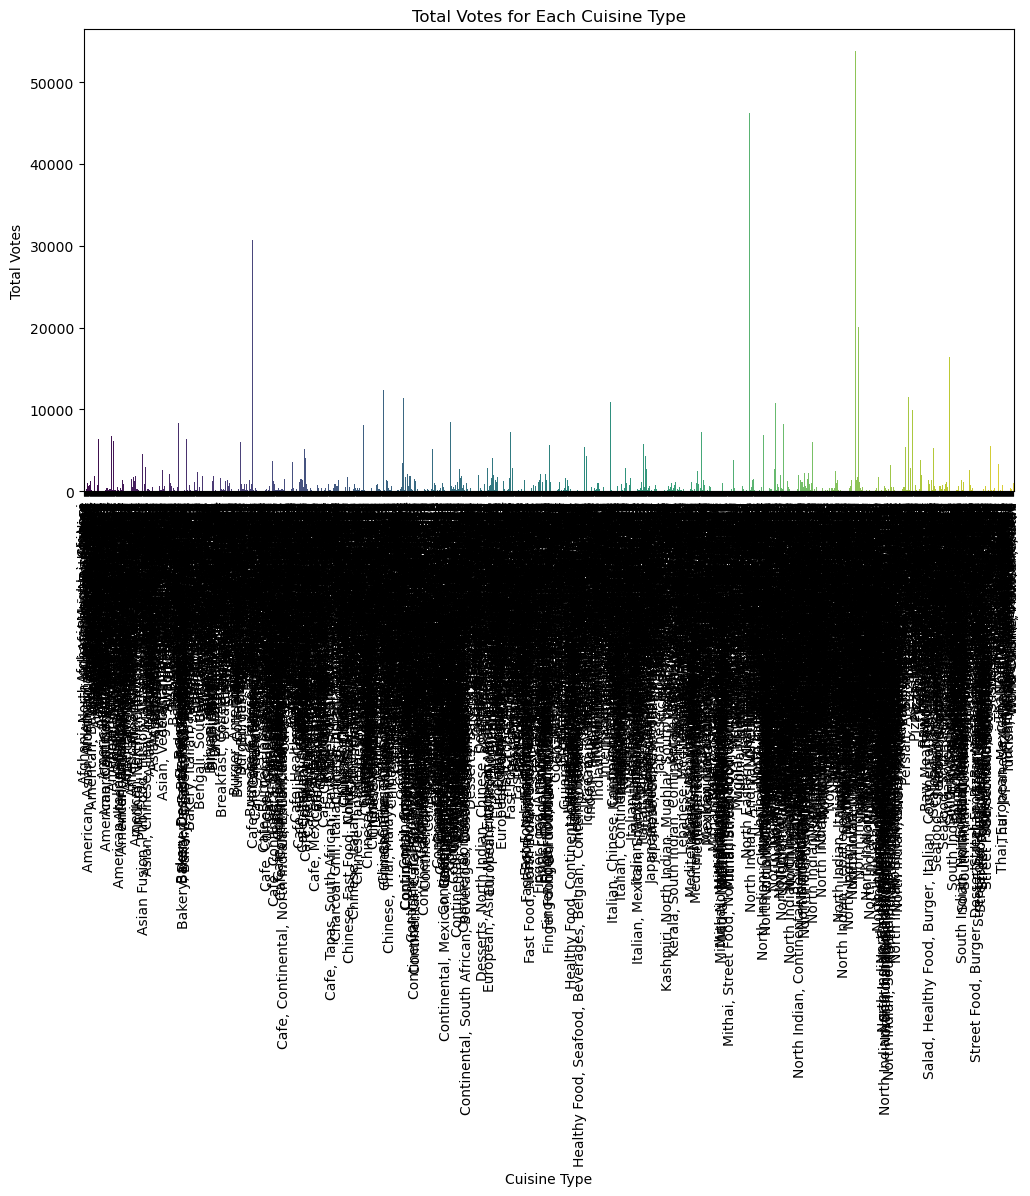

In [256]:
# Visualize the relationship between cuisine and votes
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_votes.index, y=cuisine_votes.values, palette='viridis')
plt.title('Total Votes for Each Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.show()


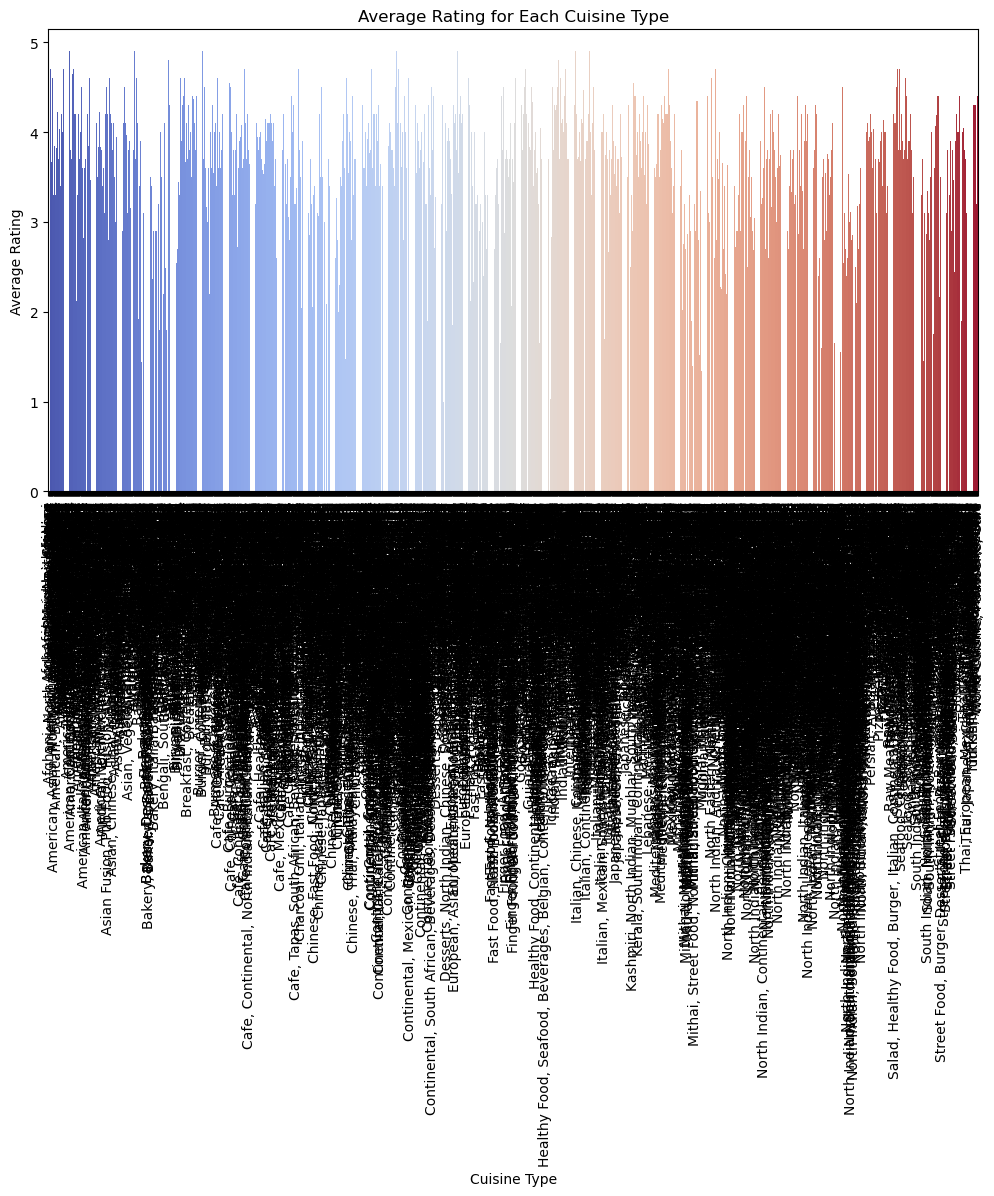

In [261]:
# Visualize the relationship between cuisine and average rating
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_ratings.index, y=cuisine_ratings.values, palette='coolwarm')
plt.title('Average Rating for Each Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


In [262]:
# Correlation between votes and ratings
correlation = df[['Votes', 'Aggregate rating']].corr()
print("Correlation between Votes and Ratings:")
print(correlation)

Correlation between Votes and Ratings:
                     Votes  Aggregate rating
Votes             1.000000          0.311461
Aggregate rating  0.311461          1.000000


Text(0, 0.5, 'Frequency')

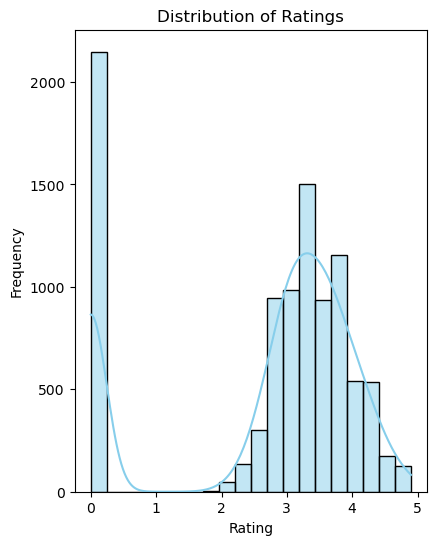

In [263]:
#Distribution of Ratings
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df1['Aggregate rating'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

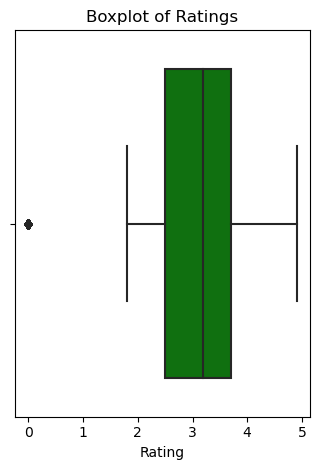

In [266]:
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['Aggregate rating'], color='green')
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')

plt.tight_layout()
plt.show()

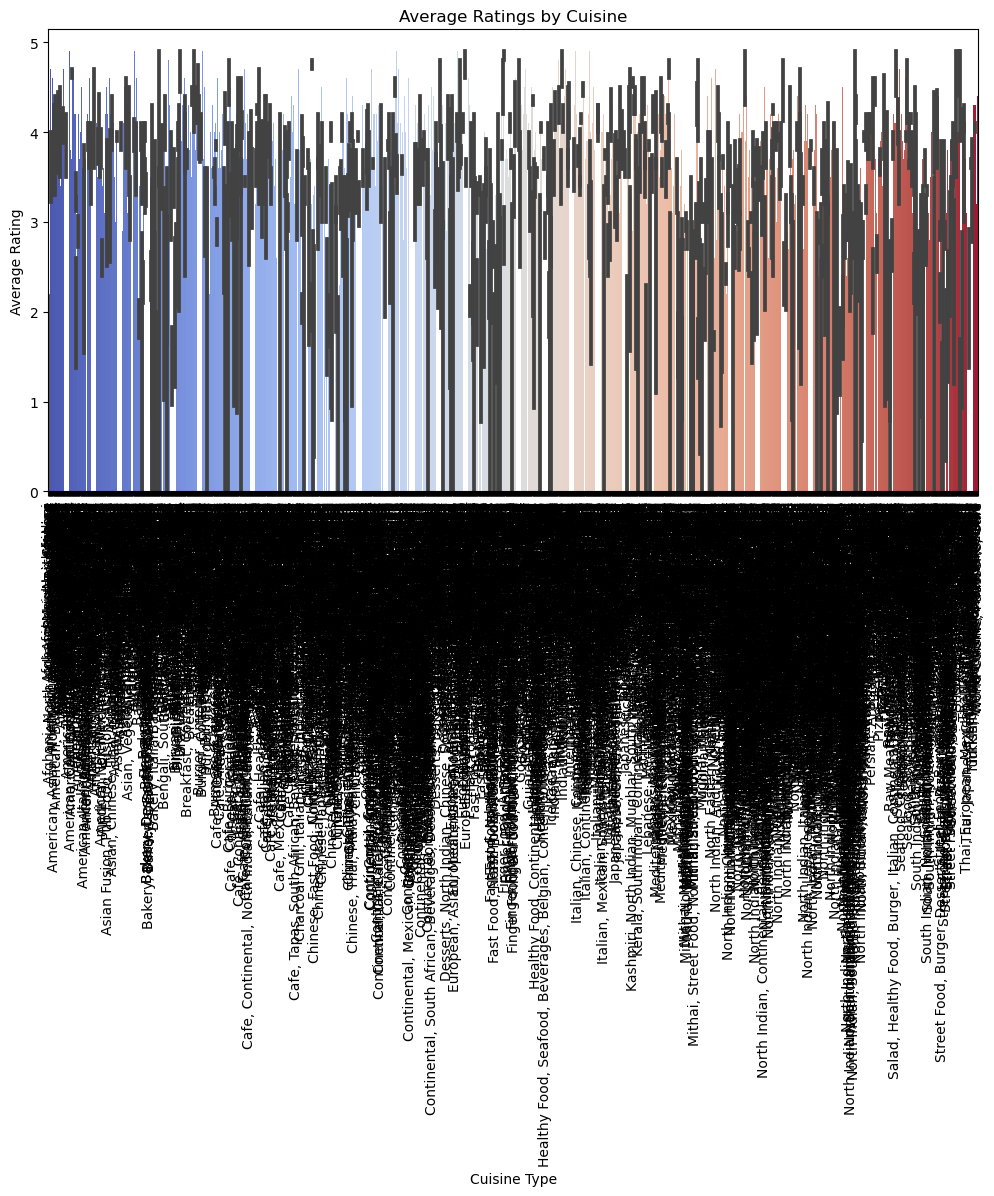

In [269]:
# Average Ratings by Cuisine
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisines', y='Aggregate rating', data=df1, palette='coolwarm')
plt.title('Average Ratings by Cuisine')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

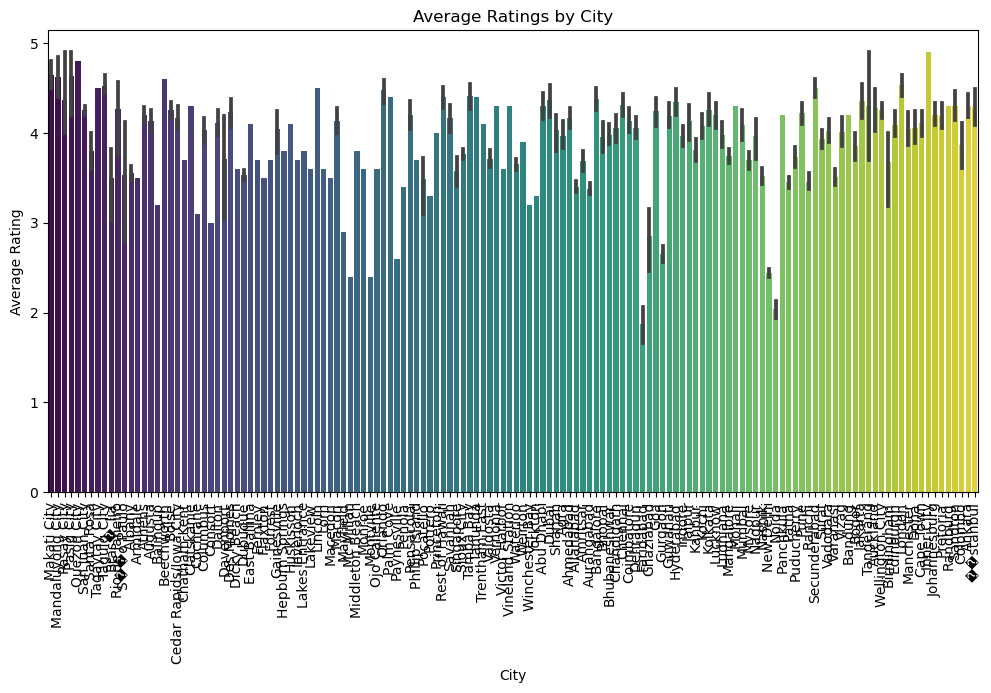

In [270]:
# Average Ratings by City
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Aggregate rating', data=df1, palette='viridis')
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

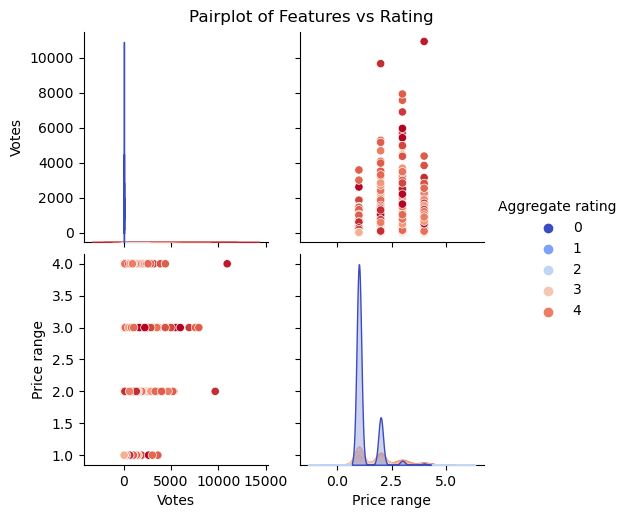

In [275]:
# Relationship Between Features and Rating (e.g., using Pairplot)
# Let's say we want to see the relationships between some features like 'votes', 'price_range', etc.
features = ['Votes', 'Price range', 'Aggregate rating']  # Add other features as needed
sns.pairplot(df1[features], hue='Aggregate rating', palette='coolwarm')
plt.suptitle('Pairplot of Features vs Rating', y=1.02)
plt.show()

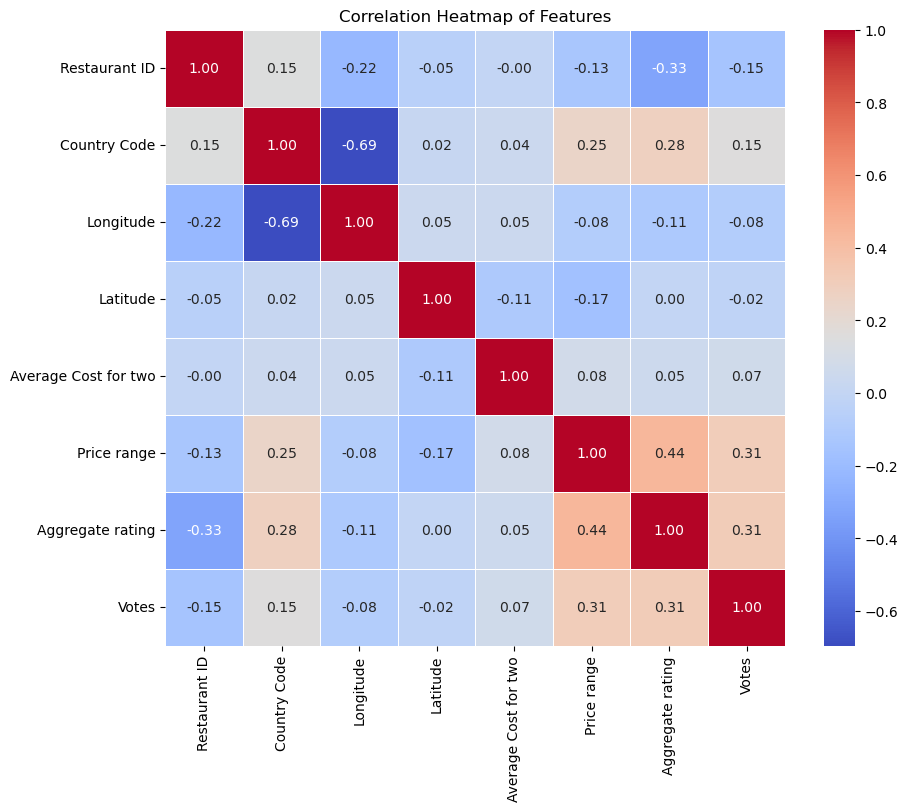

In [276]:
# Correlation Heatmap between numeric features
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()